# Optimial expression to find

$$Y = 0.4X_2^2 + 2X_4 + 2$$

# Results summary

| Linear Regression                                               | LightGBM Regressor                                             | Linear Regression + ATgfe                               |
|-----------------------------------------------------------------|----------------------------------------------------------------|---------------------------------------------------------|
| <ul>     <li>RMSE: 30077.269</li>     <li>r^2: 0.943</li> </ul> | <ul>     <li>RMSE: 980.297</li>     <li>r^2: 1.0</li> </ul>    | <ul>  <li>RMSE: **0.0**</li><li>r^2: **1.0**</li> </ul> |

# Import packages

In [1]:
from atgfe.GeneticFeatureEngineer import GeneticFeatureEngineer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.regressor import ResidualsPlot, PredictionError
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('./data/generated_4.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,802,189,916,684,437,454,668,15658.4
1,512,470,328,658,497,660,844,89678.0
2,816,954,852,992,815,923,578,366032.4
3,248,134,843,218,152,662,739,7620.4
4,552,410,800,232,299,582,37,67706.0


In [3]:
target = 'Y'
columns = df.drop(target, axis=1).columns.tolist()

In [4]:
X = df.drop(target, axis=1).copy()
Y = df.loc[:, target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

In [5]:
def display_residual_plot(model):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()                 

In [6]:
def prediction_error_plot(model):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()     

In [7]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [8]:
def score_model(model, X, y):
    evaluation_metric_scorer = make_scorer(rmse, greater_is_better=True)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=evaluation_metric_scorer, n_jobs=-1)
    scores_mean = scores.mean()
    score_std = scores.std()
    print('Mean of metric: {}, std: {}'.format(scores_mean, score_std))

In [9]:
def create_new_model():
    return make_pipeline(StandardScaler(), LinearRegression())

# Using LightGBM

In [10]:
lgbm_model = LGBMRegressor(random_state=7)

In [11]:
score_model(lgbm_model, X, Y)

Mean of metric: 980.2975976486816, std: 97.37702478188326


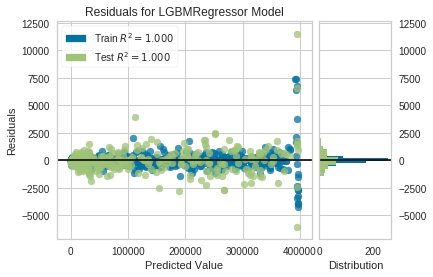

In [12]:
display_residual_plot(lgbm_model)

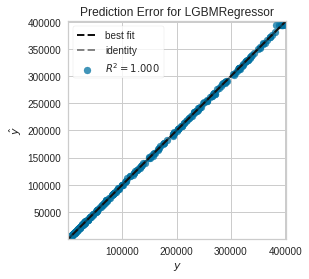

In [13]:
prediction_error_plot(lgbm_model)

# Using Linear Regression

In [14]:
model = create_new_model()

In [15]:
score_model(model, X, Y)

Mean of metric: 30077.26935922344, std: 918.5774622783294


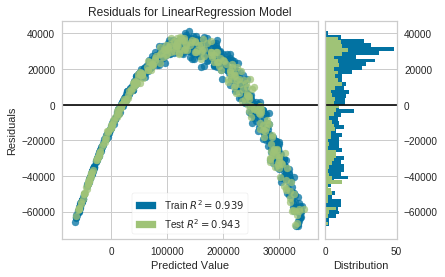

In [16]:
display_residual_plot(model)

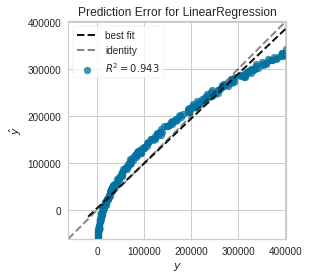

In [17]:
prediction_error_plot(model)

# Using ATgfe

In [18]:
gfe = GeneticFeatureEngineer(model, x_train=X_train, y_train=y_train, numerical_features=columns,
                             number_of_candidate_features=1,
                             number_of_interacting_features=4,
                             evaluation_metric=rmse, fit_wo_original_columns=True, enable_weights=True,
                             shuffle_training_data_every_generation=True, n_jobs=16)

2019-11-26 22:34:37,665:INFO: New Engineer created with the following parameters: 
2019-11-26 22:34:37,667:INFO: 
Model type: <class 'sklearn.pipeline.Pipeline'>
Numerical Features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
Number of candidate features: 1
Number of interacting features: 4
Evaluation Metric: rmse
Minimize metric is True 


In [19]:
gfe.fit(mu=2000, lambda_=2200, early_stopping_patience=5, mutation_probability=0.5, crossover_probability=0.5)

Start of evolution
   	      	                                                            fitness                                                            
   	      	-------------------------------------------------------------------------------------------------------------------------------
gen	nevals	avg        	best_ind_in_gen_val_score	best_val_score	gen	max  	min    	nevals	std        	time_in_seconds
0  	2000  	1.13511e+10	nan                      	nan           	0  	1e+11	575.183	2000  	3.17199e+10	nan            
1  	2200  	54463.2    	582.702                  	582.702       	1  	122328	578.212	2200  	32343.9    	1.30003        
2  	2200  	16528.4    	582.702                  	582.702       	2  	29160.3	546.384	2200  	13677.2    	1.40079        
3  	2200  	671.152    	552.059                  	552.059       	3  	30404.7	225.126	2200  	1497.02    	1.35256        
4  	2200  	532.753    	224.103                  	224.103       	4  	571.312	219.966	2200  	87.537     	1.32452   

# Use ATgfe

# Apply GFE

In [20]:
X = gfe.transform(X)

In [21]:
X.head(20)

,X1,X2,X3,X4,X5,X6,X7,0.032*X2**2 + 0.16*X4
0,802,189,916,684,437,454,668,1252.512
1,512,470,328,658,497,660,844,7174.080
2,816,954,852,992,815,923,578,29282.432
3,248,134,843,218,152,662,739,609.472
4,552,410,800,232,299,582,37,5416.320
5,546,984,482,423,39,289,59,31051.872
6,847,209,15,355,250,914,198,1454.592
7,73,392,40,511,108,259,730,4999.008
8,562,637,459,396,955,418,561,13047.968
9,416,570,371,925,296,390,994,10544.800


In [22]:
model = create_new_model()

In [23]:
score_model(model, X, Y)

Mean of metric: 1.3846303833873306e-10, std: 6.232622770541874e-11


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

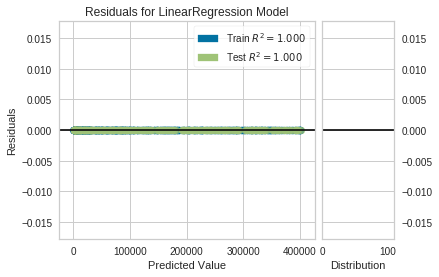

In [25]:
display_residual_plot(model)

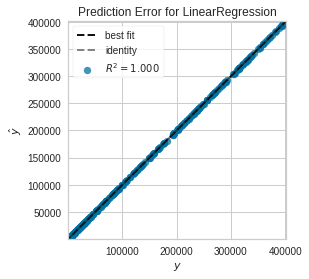

In [26]:
prediction_error_plot(model)